In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import ast
import numpy as np

In [119]:
df = pd.read_json('../data/response.json')

In [120]:
df['category'].value_counts()

Protocol         48
Uncategorized    18
Social           10
Product           7
Grants            6
Service           4
Ventures          3
Investment        2
Name: category, dtype: int64

In [121]:
df.drop(columns = 'documentType', inplace = True)

In [122]:
df.set_index(keys = 'name', inplace = True)

In [123]:
df.dtypes

id                       object
framework                object
cName                    object
totalProposals            int64
totalVotes                int64
uniqueVoters              int64
tokens                   object
icons                    object
key_word_tweet_count    float64
tweet_count             float64
key_word_ratio          float64
likes                   float64
like_follower_ratio     float64
twitterHandle            object
twitterURL               object
followerCount           float64
category                 object
dtype: object

In [124]:
numerics = ['float64', 'int64']

df_numerics = df.select_dtypes(include=numerics)

In [125]:
df_numerics

,totalProposals,totalVotes,uniqueVoters,key_word_tweet_count,tweet_count,key_word_ratio,likes,like_follower_ratio,followerCount
name,,,,,,,,,
1inch,3,214,175,10.0,136.0,0.073529,1214.0,0.000120,1015150.0
Aave,58,1790,890,31.0,120.0,0.258333,8464.0,0.000637,428464.0
Aavegotchi,246,78376,6532,NaN,NaN,NaN,NaN,NaN,92203.0
Alchemist,24,521,301,NaN,NaN,NaN,NaN,NaN,NaN
Alchemix Finance,40,6666,1715,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
WGMI,1,1,1,15.0,144.0,0.104167,308.0,0.004690,4378.0
Yam,114,13272,3861,38.0,140.0,0.271429,590.0,0.000614,25296.0
Yearn,24,6839,4382,19.0,130.0,0.146154,2377.0,0.000684,182864.0


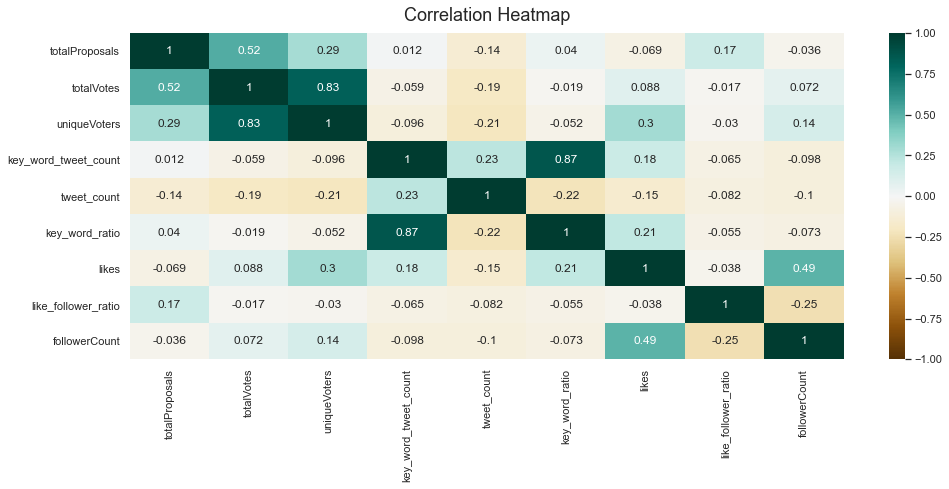

In [126]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_numerics.dropna().corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [127]:
df_numerics['avg_votes'] = df_numerics['totalVotes']/df_numerics['totalProposals']
df_numerics['avg_vote_per_person'] = df_numerics['totalVotes']/df_numerics['uniqueVoters']
df_numerics['voter_to_follower_ratio'] = df_numerics['uniqueVoters']/df_numerics['followerCount']

<ipython-input-127-65355d819c53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerics['avg_votes'] = df_numerics['totalVotes']/df_numerics['totalProposals']
<ipython-input-127-65355d819c53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerics['avg_vote_per_person'] = df_numerics['totalVotes']/df_numerics['uniqueVoters']
<ipython-input-127-65355d819c53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [128]:
heatmap2_columns = ['key_word_ratio', 'like_follower_ratio', 'avg_votes', 'avg_vote_per_person', 'voter_to_follower_ratio']

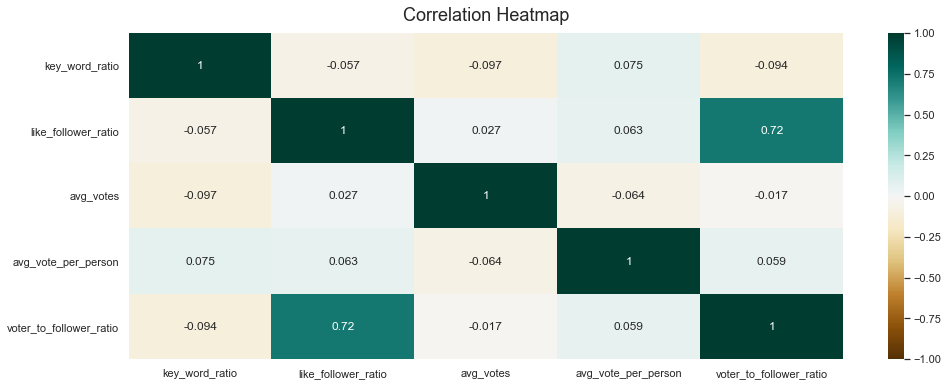

In [129]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_numerics[heatmap2_columns].dropna().corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('../figures/correlation_heatmap.svg', dpi=300)
plt.savefig('../figures/correlation_heatmap.png', dpi=300)

In [130]:
scatter_columns = ['key_word_ratio', 'like_follower_ratio', 'avg_votes', 'avg_vote_per_person', 'voter_to_follower_ratio', 'followerCount', 'uniqueVoters']

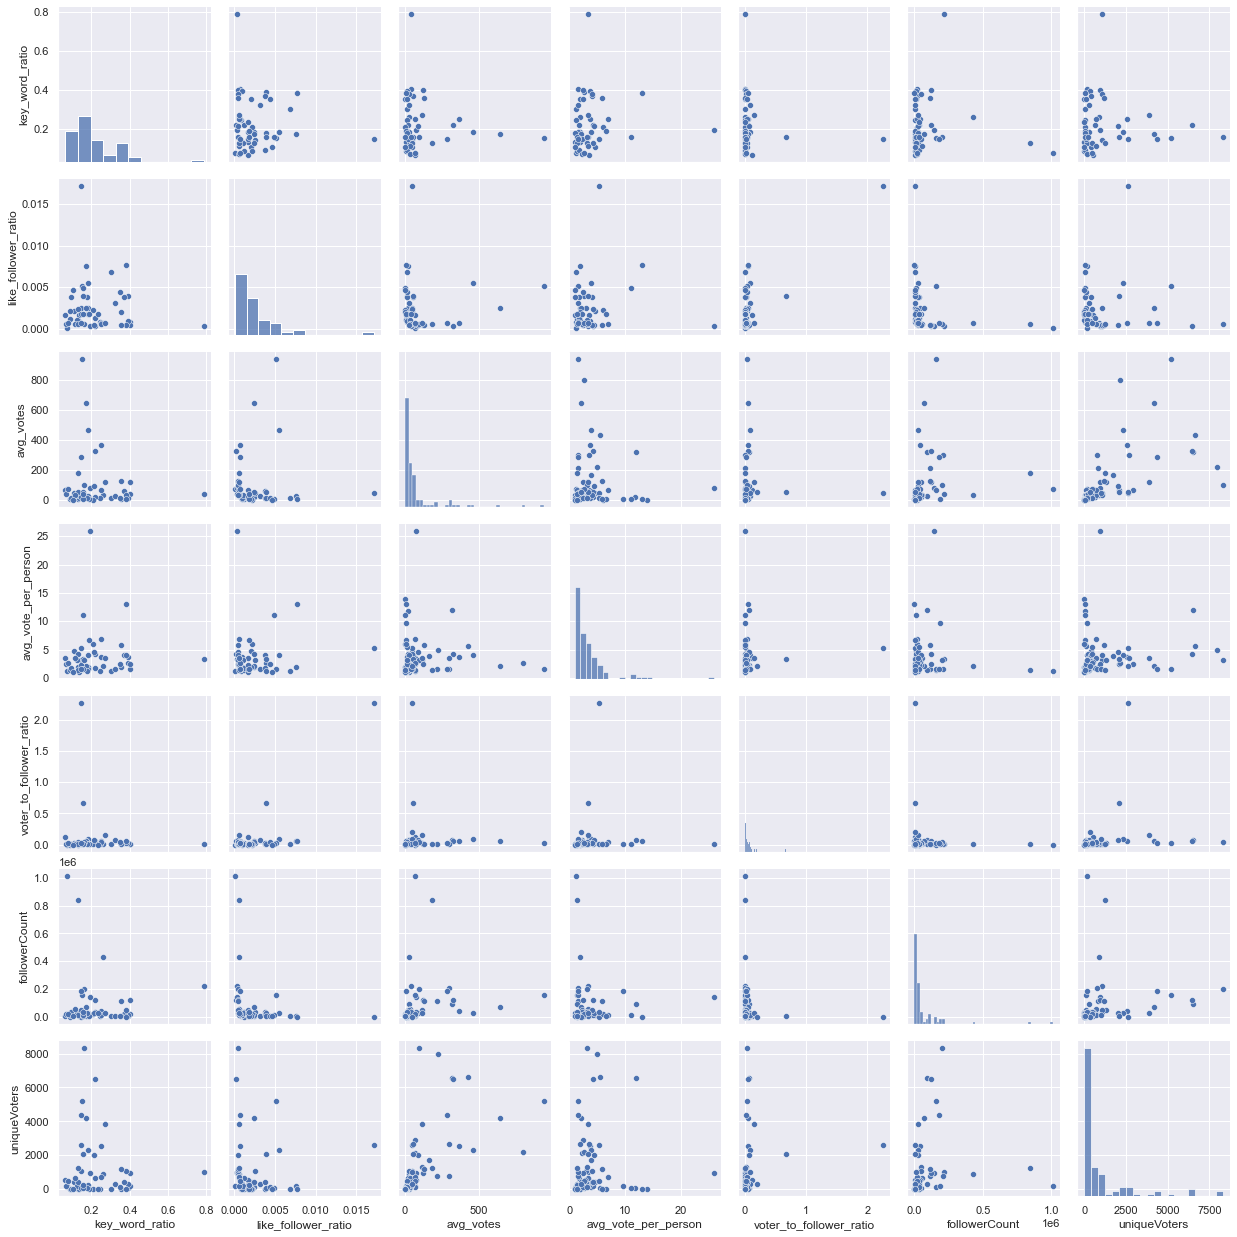

In [131]:
sns.pairplot(df_numerics[scatter_columns], x_vars = list(scatter_columns))

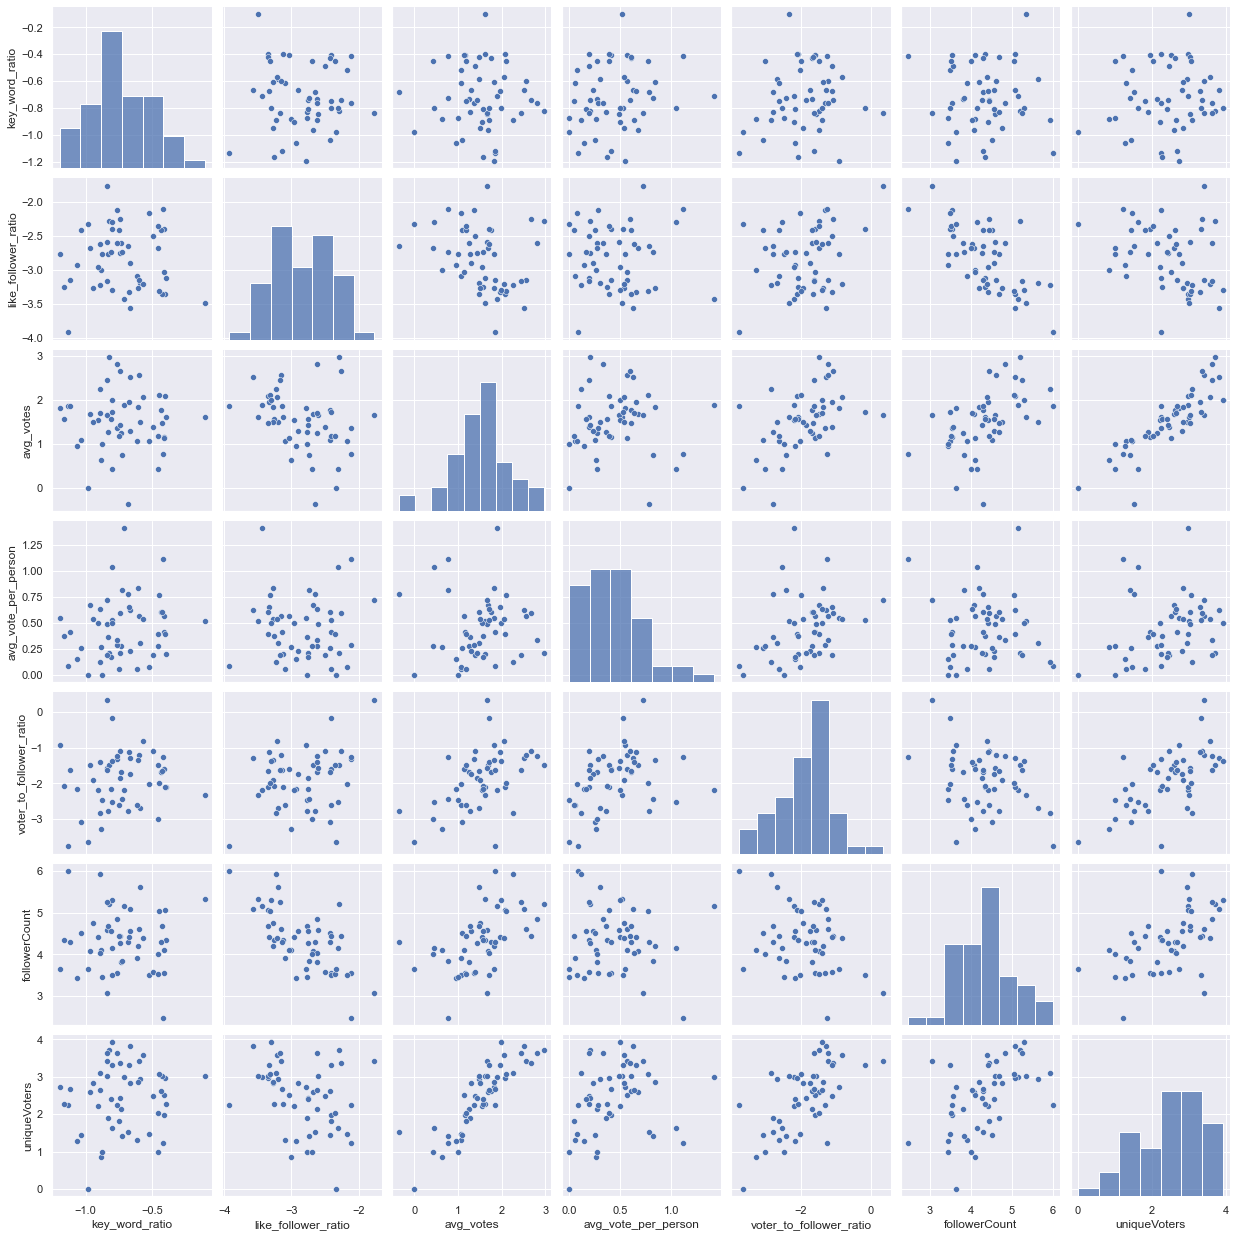

In [132]:
sns.pairplot(np.log10(df_numerics[scatter_columns].dropna()), x_vars = list(scatter_columns))

/Users/sonnguyen/opt/anaconda3/envs/dsi-111/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


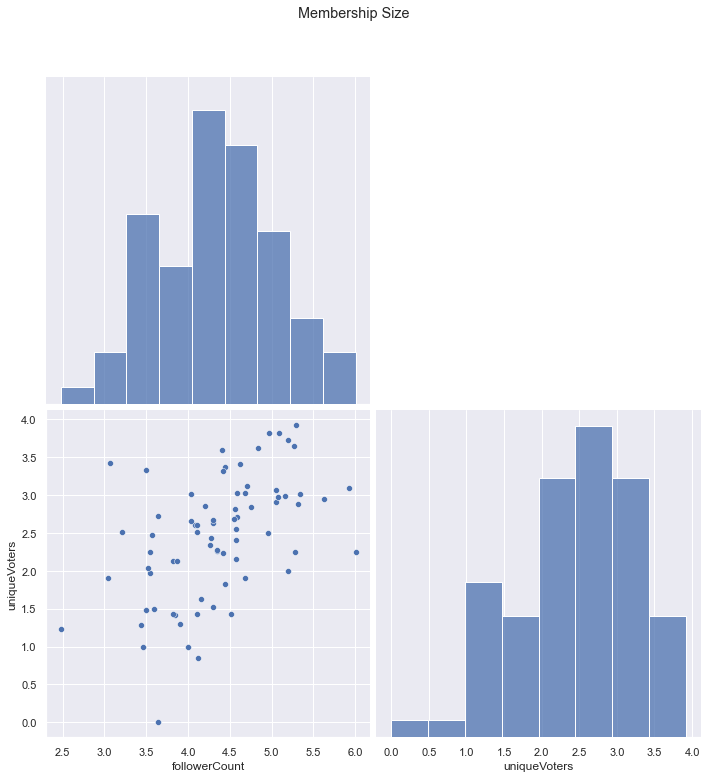

In [133]:
scatter2_cols = ['followerCount', 'uniqueVoters']
scatter2 = df_numerics[scatter2_cols]
figure = sns.pairplot(np.log10(scatter2[scatter2['uniqueVoters']>0].dropna()), x_vars = list(scatter2_cols), corner=True, size = 5)
figure.fig.suptitle("Membership Size", y=1.08)
figure.savefig("../figures/membership_size.svg", dpi=300) 
figure.savefig("../figures/membership_size.png", dpi=300) 


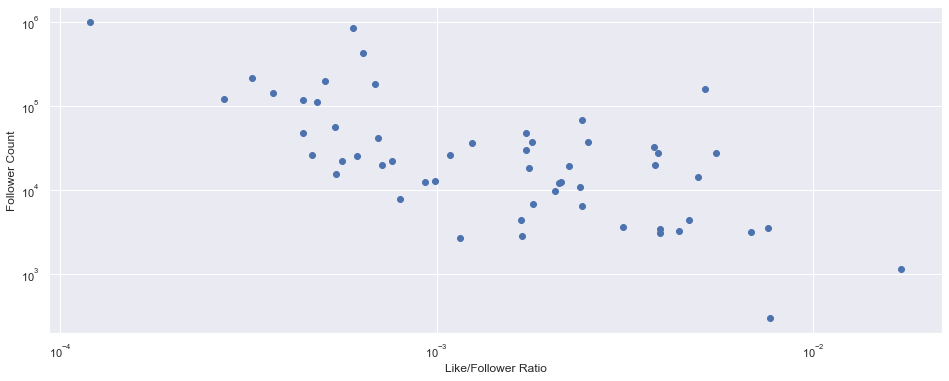

In [134]:
plt.figure(figsize=(16, 6))
plt.loglog(df_numerics['like_follower_ratio'],
            df_numerics['followerCount'],
            linewidth=0,
            marker="o")
plt.xlabel('Like/Follower Ratio')
plt.ylabel('Follower Count')
plt.savefig("../figures/like_follower_vs_count.svg", dpi=300) 
plt.savefig("../figures/like_follower_vs_count.png", dpi=300) 


In [135]:
df[df['category'] =='Ventures']

,id,framework,cName,totalProposals,totalVotes,uniqueVoters,tokens,icons,key_word_tweet_count,tweet_count,key_word_ratio,likes,like_follower_ratio,twitterHandle,twitterURL,followerCount,category
name,,,,,,,,,,,,,,,,,
Game Mine Alliance,Game Mine Alliance,DAOHaus,gameminealliance,31,28,2,None,[{'url': 'https://raw.githubusercontent.com/bo...,NaN,NaN,NaN,NaN,NaN,None,None,NaN,Ventures
Metacartel Ventures,Metacartel Ventures,DAOHaus,metacartel,447,199,33,None,[{'url': 'https://raw.githubusercontent.com/bo...,29.0,140.0,0.207143,1283.0,0.002248,None,None,19676.0,Ventures
The LAO,The LAO,DAOHaus,thelao,168,466,42,None,[{'url': 'https://raw.githubusercontent.com/bo...,19.0,120.0,0.158333,1347.0,0.004935,None,None,14365.0,Ventures


In [136]:
df_bar_columns= ['totalProposals','totalVotes', 'uniqueVoters', 'followerCount', 'category','key_word_tweet_count', 'tweet_count', 'key_word_ratio', 'likes', 'like_follower_ratio']
df_bar = df[df_bar_columns]

In [137]:
df_bar[['category', 'totalProposals']].dropna()

,category,totalProposals
name,,
1inch,Protocol,3
Aave,Protocol,58
Aavegotchi,Protocol,246
Alchemist,Service,24
Alchemix Finance,Protocol,40
...,...,...
Vesper,Uncategorized,17
WGMI,Uncategorized,1
Yam,Product,114


In [138]:
def plot_category(d, col, t):
    df = d[['category', col]].dropna()
    print(df['category'].value_counts())
    df = df.groupby(['category'])[col].mean().rename_axis('category').reset_index(name=f'Average {col}')
    plt.figure(figsize=(16, 6))
    sns.set_theme()
    sns.barplot(x="category", y=f'Average {col}', data=df, ci=None)
    plt.xlabel('Category', fontsize=18)
    plt.ylabel(f'Average {t}', fontsize=18)
    plt.title(f'Average {t} by Category', fontsize=20)
    plt.savefig(f'../figures/{t}.png', dsi=300)
    plt.savefig(f'../figures/{t}.svg', dsi=300)

Protocol         48
Uncategorized    18
Social           10
Product           7
Grants            6
Service           4
Ventures          3
Investment        2
Name: category, dtype: int64


<ipython-input-138-b691986f6e28>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dsi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'../figures/{t}.png', dsi=300)
<ipython-input-138-b691986f6e28>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dsi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'../figures/{t}.svg', dsi=300)


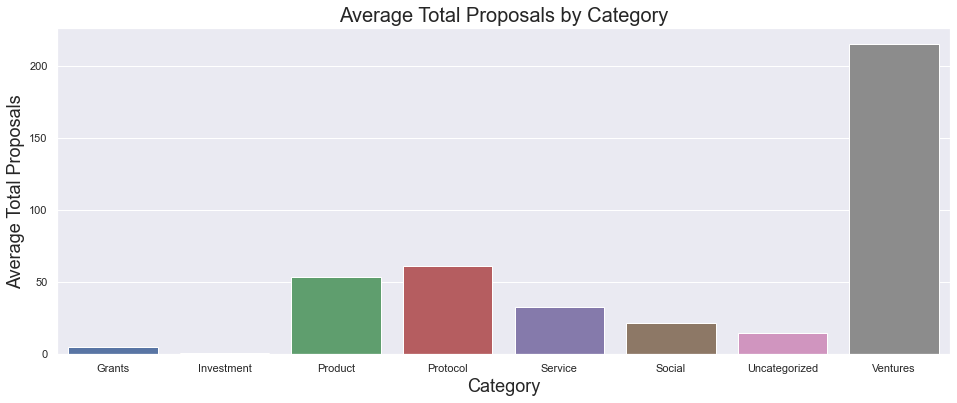

In [139]:
plot_category(df_bar, 'totalProposals', 'Total Proposals')

Protocol         29
Uncategorized    10
Social            5
Ventures          2
Investment        2
Product           2
Grants            2
Service           1
Name: category, dtype: int64


<ipython-input-138-b691986f6e28>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dsi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'../figures/{t}.png', dsi=300)
<ipython-input-138-b691986f6e28>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dsi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'../figures/{t}.svg', dsi=300)


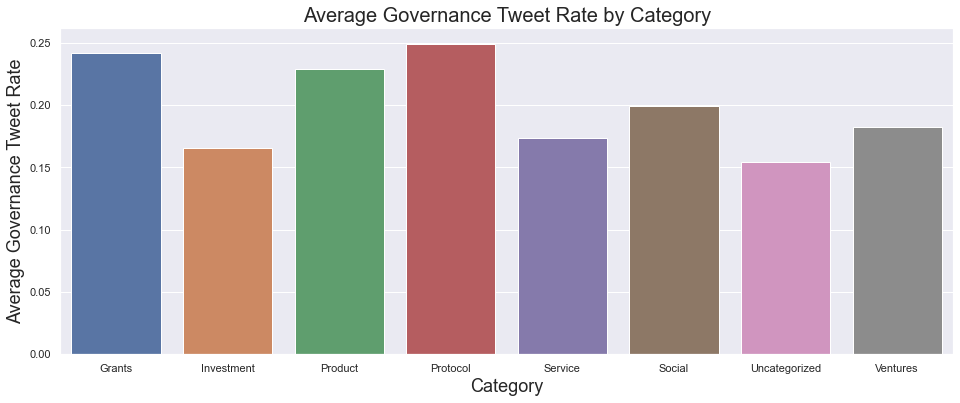

In [140]:
plot_category(df_bar, 'key_word_ratio', 'Governance Tweet Rate')

Protocol         29
Uncategorized    10
Social            5
Ventures          2
Investment        2
Product           2
Grants            2
Service           1
Name: category, dtype: int64


<ipython-input-138-b691986f6e28>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dsi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'../figures/{t}.png', dsi=300)
<ipython-input-138-b691986f6e28>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dsi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'../figures/{t}.svg', dsi=300)


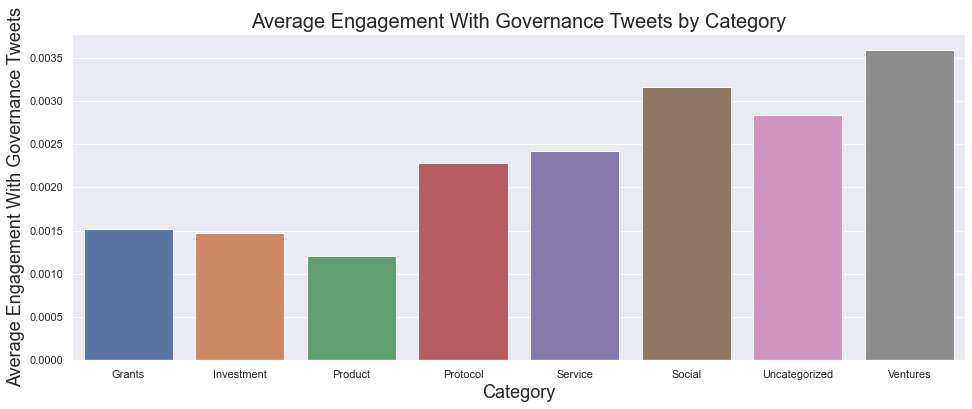

In [141]:
plot_category(df_bar, 'like_follower_ratio', 'Engagement With Governance Tweets')

Protocol         43
Uncategorized    13
Product           6
Social            6
Investment        2
Ventures          2
Grants            2
Service           1
Name: category, dtype: int64


<ipython-input-138-b691986f6e28>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dsi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'../figures/{t}.png', dsi=300)
<ipython-input-138-b691986f6e28>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dsi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'../figures/{t}.svg', dsi=300)


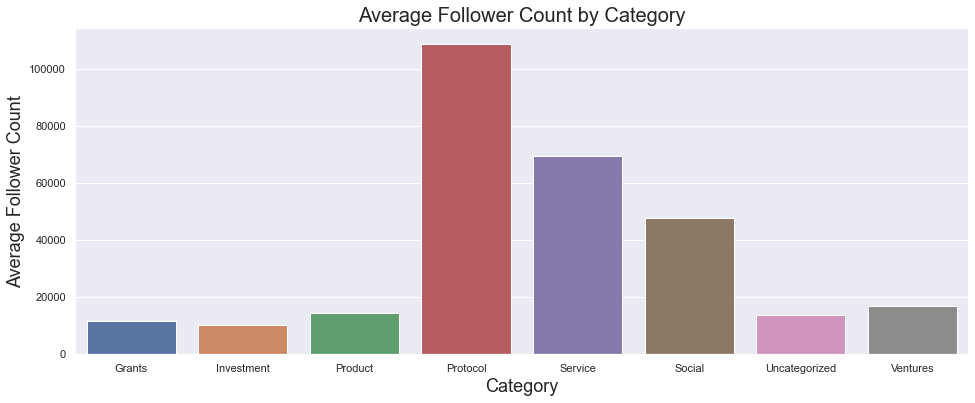

In [142]:
plot_category(df_bar, 'followerCount', 'Follower Count')

Protocol         48
Uncategorized    18
Social           10
Product           7
Grants            6
Service           4
Ventures          3
Investment        2
Name: category, dtype: int64


<ipython-input-138-b691986f6e28>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dsi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'../figures/{t}.png', dsi=300)
<ipython-input-138-b691986f6e28>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dsi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'../figures/{t}.svg', dsi=300)


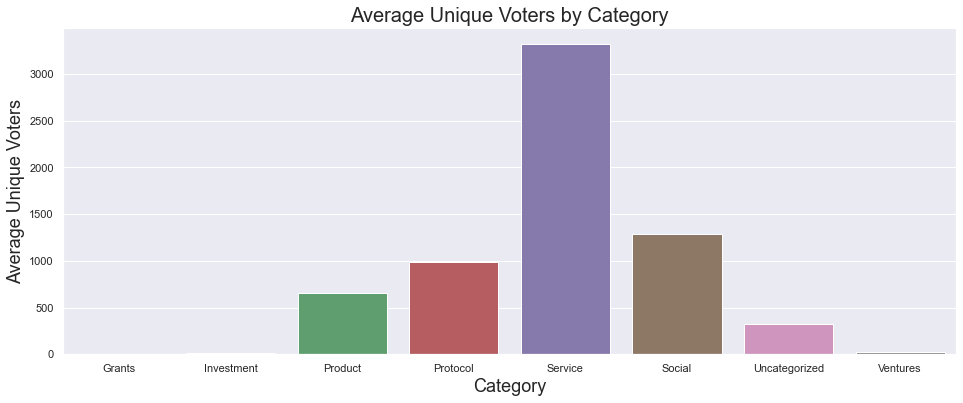

In [143]:
plot_category(df_bar, 'uniqueVoters', 'Unique Voters')

Protocol         29
Uncategorized    10
Social            5
Ventures          2
Investment        2
Product           2
Grants            2
Service           1
Name: category, dtype: int64


<ipython-input-138-b691986f6e28>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dsi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'../figures/{t}.png', dsi=300)
<ipython-input-138-b691986f6e28>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dsi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'../figures/{t}.svg', dsi=300)


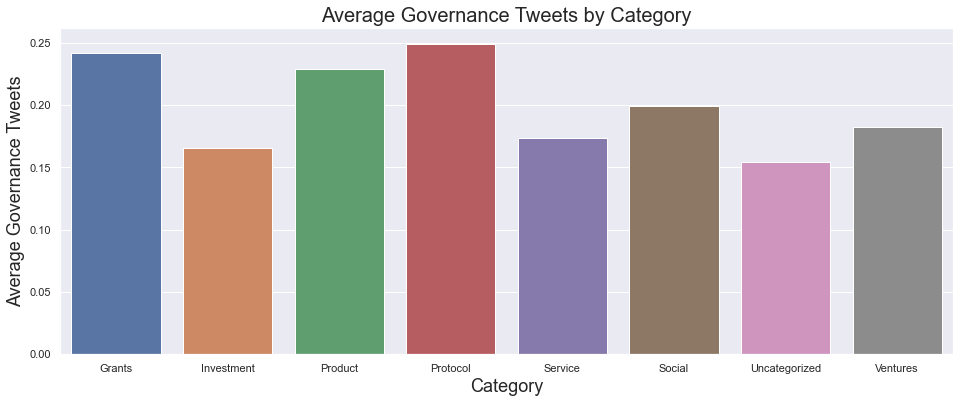

In [144]:
plot_category(df_bar, 'key_word_ratio', 'Governance Tweets')

In [145]:
df_bar_f_columns= ['totalProposals','totalVotes', 'uniqueVoters', 'followerCount', 'framework','key_word_tweet_count', 'tweet_count', 'key_word_ratio', 'likes', 'like_follower_ratio']
df_bar_framework = df[df_bar_f_columns]

In [146]:
df['framework'].value_counts()

DAOHaus               7
Governor Bravo        3
Aave Governance V2    2
Governor Alpha        1
Name: framework, dtype: int64

In [147]:
def plot_framework(d, col, t):
    df = d[['framework', col]].dropna()
    print(df['framework'].value_counts())
    df = df.groupby(['framework'])[col].mean().rename_axis('framework').reset_index(name=f'Average {col}')
    plt.figure(figsize=(16, 6))
    sns.set_theme()
    sns.barplot(x="framework", y=f'Average {col}', data=df, ci=None)
    plt.xlabel('Framework', fontsize=18)
    plt.ylabel(f'Average {t}', fontsize=18)
    plt.title(f'Average {t} by Framework', fontsize=20)
    plt.savefig(f'../figures/{t}_framework.png', dsi=300)
    plt.savefig(f'../figures/{t}_framework.svg', dsi=300)

DAOHaus               4
Governor Bravo        2
Aave Governance V2    1
Name: framework, dtype: int64


<ipython-input-147-aad02b7927f6>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dsi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'../figures/{t}_framework.png', dsi=300)
<ipython-input-147-aad02b7927f6>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dsi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'../figures/{t}_framework.svg', dsi=300)


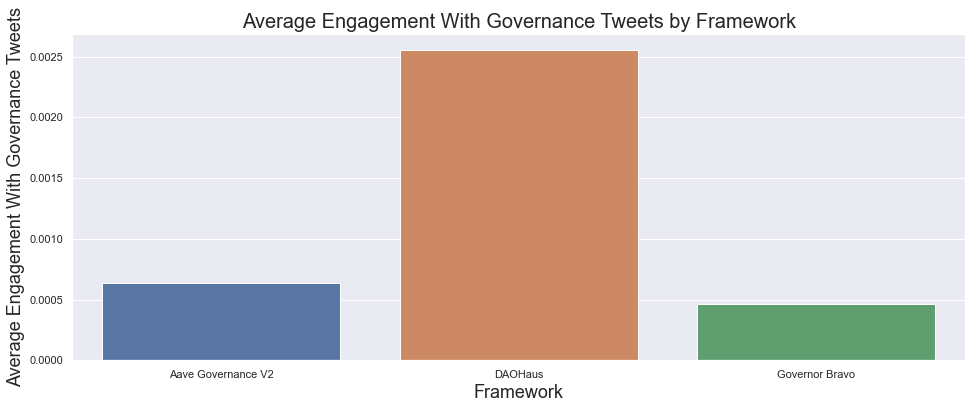

In [148]:
plot_framework(df_bar_framework, 'like_follower_ratio', 'Engagement With Governance Tweets')

/Users/sonnguyen/opt/anaconda3/envs/dsi-111/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Keyword Ratio Distribution')

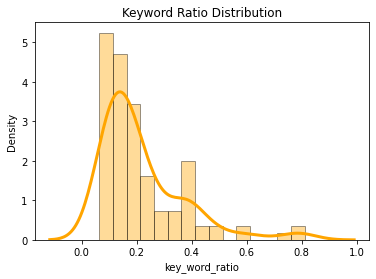

In [ ]:
sns.distplot(
    keywords['key_word_ratio'], hist=True, kde=True,
    bins = int(75/5), color = 'orange',
    hist_kws={'edgecolor':'black'},
    kde_kws={'linewidth': 3})
plt.title('Keyword Ratio Distribution')

/Users/sonnguyen/opt/anaconda3/envs/dsi-111/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Tweet Like/Follower Ratio Distribution')

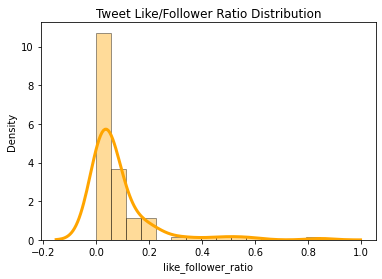

In [ ]:
sns.distplot(
    keywords['like_follower_ratio'], hist=True, kde=True,
    bins = int(75/5), color = 'orange',
    hist_kws={'edgecolor':'black'},
    kde_kws={'linewidth': 3})
plt.title('Tweet Like/Follower Ratio Distribution')

In [ ]:
td_info = pd.merge(twitter_dao, keywords, on=['name','follower_count'])

,name,twitter_handle,twitter_url,follower_count,cname,categories,totalProposals,totalVotes,uniqueVoters,icons,tokens,type,key_word_tweet_count,tweet_count,key_word_ratio,likes,like_follower_ratio
0,1inch,1inch,https://twitter.com/1inch,1015150.0,1inch,['Protocol'],3.0,214.0,175.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': '1inch', 'ne...",DAO,10,136,0.073529,1214,0.001196
1,Aave,AaveAave,https://twitter.com/AaveAave,428464.0,aave,['Protocol'],58.0,1790.0,890.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'aave', 'net...",DAO,31,120,0.258333,8464,0.019754
2,Armor,ArmorFi,https://twitter.com/ArmorFi,7958.0,armorfi,['Investment'],2.0,23.0,20.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'armor', 'ne...",DAO,41,168,0.244048,260,0.032672
3,B.Protocol,bprotocoleth,https://twitter.com/bprotocoleth,6589.0,bprotocol,['Protocol'],14.0,238.0,127.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'bpro', 'net...",DAO,30,163,0.184049,482,0.073152
4,Balancer,BalancerLabs,https://twitter.com/BalancerLabs,121912.0,balancer,['Protocol'],82.0,26509.0,6454.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'bal', 'netw...",DAO,30,138,0.217391,992,0.008137
5,Bancor,bancor,https://twitter.com/bancor,145462.0,bancor,['Protocol'],316.0,24512.0,947.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'vbnt', 'net...",DAO,20,103,0.194175,1071,0.007363
6,Bankless DAO,banklessDAO,https://twitter.com/banklessDAO,41675.0,banklessvault,['Media'],26.0,9522.0,2561.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'bank', 'net...",DAO,38,151,0.251656,1107,0.026563
7,Blockzero Labs,blockzerolabs,https://twitter.com/blockzerolabs,12086.0,blockzerolabs,['Uncategorized'],38.0,1858.0,396.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'xio', 'netw...",DAO,15,138,0.108696,382,0.031607
8,Compound,compoundfinance,https://twitter.com/compoundfinance,218838.0,compound,['Protocol'],84.0,3429.0,1038.0,"[{'adapter': 'default', 'size': 'small', 'url'...","[{'adapter': 'default', 'symbol': 'comp', 'net...",DAO,104,132,0.787879,7354,0.033605
9,Convex Finance,ConvexFinance,https://twitter.com/ConvexFinance,38068.0,convexfinance,['Protocol'],65.0,2832.0,993.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'cvx', 'netw...",DAO,17,118,0.144068,1635,0.042949
